In [1]:
import pandas as pd
from datetime import datetime
from dateutil import parser
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
caltech = pd.read_csv("caltechPostCleaning.csv")

In [3]:
transactions = pd.read_csv("transactionPostCleaning.csv")

In [4]:
meterValues = pd.read_csv("metervaluesPostCleaning.csv")

# Clustering

## 1. Caltech Dataset

In [5]:
caltech = pd.read_csv("caltechPostCleaning.csv")

In [6]:
caltech.head()

,Unnamed: 0,_id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,totalChargingTime,totalConnectionTime
0,0,5bc90cb9f9af8b0d7fe77cd2,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,NaN,7986.0,7926.0
1,1,5bc90cb9f9af8b0d7fe77cd3,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,NaN,10745.0,40266.0
2,2,5bc90cb9f9af8b0d7fe77cd4,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,NaN,3954.0,33535.0
3,3,5bc90cb9f9af8b0d7fe77cd5,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,NaN,5296.0,33508.0
4,4,5bc90cb9f9af8b0d7fe77cd6,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,NaN,10796.0,30158.0


In [7]:
caltech.columns

Index(['Unnamed: 0', '_id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs', 'totalChargingTime',
       'totalConnectionTime'],
      dtype='object')

In [8]:
caltech.drop(columns = ["Unnamed: 0"], inplace = True)

In [9]:
dropCols = []

In [10]:
caltech.head()

,_id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,totalChargingTime,totalConnectionTime
0,5bc90cb9f9af8b0d7fe77cd2,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,NaN,7986.0,7926.0
1,5bc90cb9f9af8b0d7fe77cd3,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,NaN,10745.0,40266.0
2,5bc90cb9f9af8b0d7fe77cd4,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,NaN,3954.0,33535.0
3,5bc90cb9f9af8b0d7fe77cd5,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,NaN,5296.0,33508.0
4,5bc90cb9f9af8b0d7fe77cd6,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,NaN,10796.0,30158.0


In [11]:
caltech.siteID.value_counts()

2    31424
Name: siteID, dtype: int64

In [12]:
dropCols.append("siteID")

(<AxesSubplot:>,
 America/Los_Angeles    31424
 Name: timezone, dtype: int64)

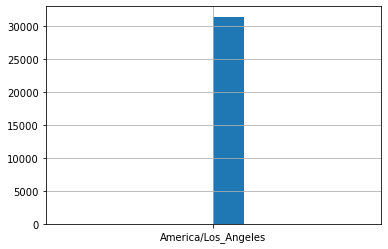

In [13]:
caltech.timezone.hist(), caltech.timezone.value_counts()

In [14]:
dropCols.append("timezone")

In [15]:
caltech.userID.value_counts()

743.0      485
562.0      385
1082.0     383
1470.0     315
1746.0     315
          ... 
15116.0      1
1554.0       1
369.0        1
1.0          1
13056.0      1
Name: userID, Length: 571, dtype: int64

In [16]:
caltech._id.nunique(), caltech.shape

(31424, (31424, 14))

In [17]:
dropCols.append("_id")

In [18]:
caltech.head()

,_id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,totalChargingTime,totalConnectionTime
0,5bc90cb9f9af8b0d7fe77cd2,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,NaN,7986.0,7926.0
1,5bc90cb9f9af8b0d7fe77cd3,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,NaN,10745.0,40266.0
2,5bc90cb9f9af8b0d7fe77cd4,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,NaN,3954.0,33535.0
3,5bc90cb9f9af8b0d7fe77cd5,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,NaN,5296.0,33508.0
4,5bc90cb9f9af8b0d7fe77cd6,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,NaN,10796.0,30158.0


In [19]:
caltech.connectionTime[0]

'2018-04-25 11:08:04'

In [20]:
caltech.spaceID.nunique()

55

In [21]:
dropCols.extend(["sessionID", "spaceID","stationID"])

In [22]:
def timeToInt(stamp):
    stamp = parser.parse(stamp)
    return int(stamp.strftime("%H%M%S"))

In [23]:
stamp = parser.parse(caltech.connectionTime[0])
hours = stamp.hour * 60 * 60
mins = stamp.minute * 60
secs = stamp.second
hours + mins + secs

40084

In [24]:
timeToInt(caltech.connectionTime[0])

110804

In [25]:
connectionTimes = list(caltech.connectionTime)
type(connectionTimes[0])


str

In [26]:
originalConnectionTimes = connectionTimes[::]

In [27]:
for idx in range(len(connectionTimes)):
    connectionTimes[idx] = timeToInt(connectionTimes[idx])

In [28]:
disconnectTimes = list(caltech.disconnectTime)
originalDisconnectTimes = disconnectTimes[::]

In [29]:
disconnectTimes = list(caltech.disconnectTime)
for idx in range(len(disconnectTimes)):
    disconnectTimes[idx] = timeToInt(disconnectTimes[idx])

In [30]:
doneChargingTimes = list(caltech.doneChargingTime)
originalDoneChargingTimes = doneChargingTimes[::]

In [31]:
doneChargingTimes = list(caltech.doneChargingTime)
for idx in range(len(doneChargingTimes)):
    try:
        doneChargingTimes[idx] = timeToInt(doneChargingTimes[idx])
    except:
        continue

In [32]:
dropCols

['siteID', 'timezone', '_id', 'sessionID', 'spaceID', 'stationID']

In [33]:
caltech.drop(columns = dropCols, inplace = True)

In [34]:
caltech.columns

Index(['connectionTime', 'disconnectTime', 'doneChargingTime', 'kWhDelivered',
       'userID', 'userInputs', 'totalChargingTime', 'totalConnectionTime'],
      dtype='object')

In [35]:
caltech["connTime"] = connectionTimes

In [36]:
caltech["disconnTime"] = disconnectTimes
caltech["doneTime"] = doneChargingTimes

In [37]:
doneChargingTimes.count(0)

2

In [38]:
caltech.shape, caltech.dropna(subset = ["doneTime"]).shape

((31424, 11), (29369, 11))

In [39]:
caltech.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,userID,userInputs,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,NaN,NaN,7986.0,7926.0,110804,132010,132110.0
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,NaN,NaN,10745.0,40266.0,134510,5616,164415.0
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,NaN,NaN,3954.0,33535.0,134550,230445,145144.0
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,NaN,NaN,5296.0,33508.0,143706,235534,160522.0
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,NaN,NaN,10796.0,30158.0,144034,230312,174030.0


In [40]:
caltechDf = caltech.dropna(subset = ["doneTime"]).copy()

In [41]:
caltechDf.drop(columns = ["userID", "userInputs"], inplace = True)

In [42]:
caltechDf

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986.0,7926.0,110804,132010,132110.0
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745.0,40266.0,134510,5616,164415.0
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954.0,33535.0,134550,230445,145144.0
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296.0,33508.0,143706,235534,160522.0
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796.0,30158.0,144034,230312,174030.0
...,...,...,...,...,...,...,...,...,...
31416,2021-09-13 19:43:16,2021-09-14 01:34:43,2021-09-14 00:28:06,16.370,17090.0,21087.0,194316,13443,2806.0
31417,2021-09-13 19:53:30,2021-09-13 22:33:34,2021-09-13 20:56:33,2.902,3783.0,9604.0,195330,223334,205633.0
31419,2021-09-13 21:12:53,2021-09-14 00:25:36,2021-09-13 21:41:31,2.285,1718.0,11563.0,211253,2536,214131.0
31420,2021-09-13 21:17:04,2021-09-14 01:01:49,2021-09-13 23:18:07,6.715,7263.0,13485.0,211704,10149,231807.0


In [43]:
# totConnTimes = list(caltechDf.totalConnectionTime)
# for idx, val in enumerate(totConnTimes):
#     totConnTimes[idx] = val / (60*60)

In [44]:
# caltechDf["totConnHr"] = totConnTimes

In [45]:
def dropOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    return df.loc[filter]  

In [46]:
caltechDf.shape

(29369, 9)

<AxesSubplot:>

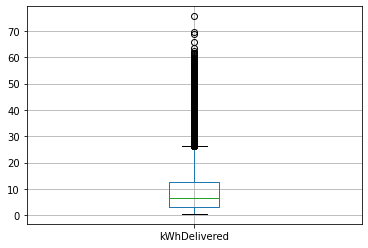

In [47]:
caltechDf.boxplot("kWhDelivered")

In [48]:
dropOutliers(caltechDf, "kWhDelivered")

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986.0,7926.0,110804,132010,132110.0
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745.0,40266.0,134510,5616,164415.0
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954.0,33535.0,134550,230445,145144.0
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296.0,33508.0,143706,235534,160522.0
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796.0,30158.0,144034,230312,174030.0
...,...,...,...,...,...,...,...,...,...
31416,2021-09-13 19:43:16,2021-09-14 01:34:43,2021-09-14 00:28:06,16.370,17090.0,21087.0,194316,13443,2806.0
31417,2021-09-13 19:53:30,2021-09-13 22:33:34,2021-09-13 20:56:33,2.902,3783.0,9604.0,195330,223334,205633.0
31419,2021-09-13 21:12:53,2021-09-14 00:25:36,2021-09-13 21:41:31,2.285,1718.0,11563.0,211253,2536,214131.0
31420,2021-09-13 21:17:04,2021-09-14 01:01:49,2021-09-13 23:18:07,6.715,7263.0,13485.0,211704,10149,231807.0


In [49]:
caltechDf = dropOutliers(caltechDf, "kWhDelivered")

In [50]:
# totalChargingTime	totalConnectionTime	connTime	disconnTime	doneTime

In [51]:
caltechDf = dropOutliers(caltechDf, "totalConnectionTime")

<AxesSubplot:>

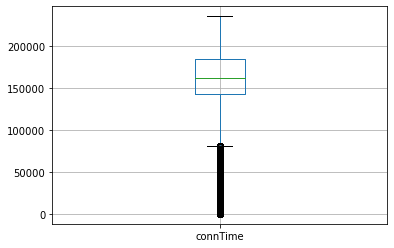

In [52]:
caltechDf.boxplot("connTime")

In [53]:
# originalConnectionTime = list(caltechDf.connectionTime)
# originalDisconnectTime = list(caltechDf.disconnectTime)
# originalDoneChargingTime = list(caltechDf.doneChargingTime)

In [54]:
# caltechDf.drop(columns = ["connectionTime", "disconnectTime", "doneChargingTime"], inplace = True)

In [55]:
caltechDf["doneTime"] = caltechDf["doneTime"].astype(int)

In [56]:
caltechDf["totalConnectionTime"] = caltechDf["totalConnectionTime"].astype(int)
caltechDf["totalChargingTime"] = caltechDf["totalChargingTime"].astype(int)

In [57]:
caltechDf

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986,7926,110804,132010,132110
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745,40266,134510,5616,164415
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954,33535,134550,230445,145144
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296,33508,143706,235534,160522
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796,30158,144034,230312,174030
...,...,...,...,...,...,...,...,...,...
31416,2021-09-13 19:43:16,2021-09-14 01:34:43,2021-09-14 00:28:06,16.370,17090,21087,194316,13443,2806
31417,2021-09-13 19:53:30,2021-09-13 22:33:34,2021-09-13 20:56:33,2.902,3783,9604,195330,223334,205633
31419,2021-09-13 21:12:53,2021-09-14 00:25:36,2021-09-13 21:41:31,2.285,1718,11563,211253,2536,214131
31420,2021-09-13 21:17:04,2021-09-14 01:01:49,2021-09-13 23:18:07,6.715,7263,13485,211704,10149,231807


In [58]:
caltechDf.kWhDelivered[10] * 1000

6955.0

In [59]:
kiloWatts = list(caltechDf.kWhDelivered)

In [60]:
# watts = [int(i * 1000) for i in kiloWatts]

In [61]:
# sum = 0
# for i, j in zip(kiloWatts, watts):
#     print(i, j)

In [62]:
# caltechDf["wHdelievered"] = watts

In [63]:
caltechDf

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986,7926,110804,132010,132110
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745,40266,134510,5616,164415
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954,33535,134550,230445,145144
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296,33508,143706,235534,160522
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796,30158,144034,230312,174030
...,...,...,...,...,...,...,...,...,...
31416,2021-09-13 19:43:16,2021-09-14 01:34:43,2021-09-14 00:28:06,16.370,17090,21087,194316,13443,2806
31417,2021-09-13 19:53:30,2021-09-13 22:33:34,2021-09-13 20:56:33,2.902,3783,9604,195330,223334,205633
31419,2021-09-13 21:12:53,2021-09-14 00:25:36,2021-09-13 21:41:31,2.285,1718,11563,211253,2536,214131
31420,2021-09-13 21:17:04,2021-09-14 01:01:49,2021-09-13 23:18:07,6.715,7263,13485,211704,10149,231807


In [64]:
timeDiffs = []
originalConnectionTime = list(caltechDf.connectionTime)
originalDisconnectTime = list(caltechDf.disconnectTime)
originalDoneChargingTime = list(caltechDf.doneChargingTime)
for i, j in zip(originalDisconnectTime, originalDoneChargingTime):
    dt1 = parser.parse(i)
    dt2 = parser.parse(j)
    diff = dt1 - dt2
    timeDiffs.append(diff)
for idx, i in enumerate(timeDiffs):
    timeDiffs[idx] = i.seconds

In [65]:
# timeDiffs

In [66]:
caltechDf["timeDiff"] = timeDiffs

In [67]:
# caltechDf.drop(columns = ["kWhDelivered"], inplace = True)

In [68]:
# count = 0
# timeDiffs[0].seconds
# for i in timeDiffs:
#     if i < 0:
#         count += 1
# print(count)

In [69]:
# dasads

<AxesSubplot:>

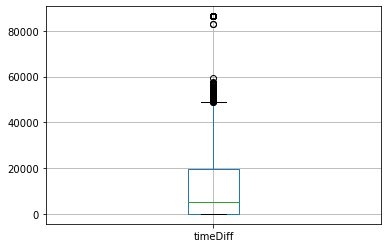

In [70]:
caltechDf.boxplot("timeDiff")

In [71]:
caltechDf[caltechDf.timeDiff > 50000]

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,timeDiff
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932000,7986,7926,110804,132010,132110,86340
9,2018-04-25 15:12:11,2018-04-25 18:29:21,2018-04-25 18:30:20,2.439000,11889,11830,151211,182921,183020,86341
34,2018-04-25 19:32:05,2018-04-25 21:46:47,2018-04-25 21:47:47,6.523000,8142,8082,193205,214647,214747,86340
87,2018-04-26 17:08:18,2018-04-27 00:56:01,2018-04-27 00:56:59,10.411000,28121,28063,170818,5601,5659,86342
135,2018-04-27 18:17:36,2018-04-28 00:29:23,2018-04-28 00:30:23,1.759000,22367,22307,181736,2923,3023,86340
...,...,...,...,...,...,...,...,...,...,...
30733,2021-08-11 22:43:36,2021-08-11 23:20:30,2021-08-11 23:21:28,0.859509,2272,2214,224336,232030,232128,86342
30848,2021-08-17 16:57:59,2021-08-18 01:02:38,2021-08-18 01:03:36,1.424000,29137,29079,165759,10238,10336,86342
30973,2021-08-24 16:19:27,2021-08-24 17:06:45,2021-08-24 17:07:43,0.832000,2896,2838,161927,170645,170743,86342
31005,2021-08-25 20:47:15,2021-08-25 21:47:40,2021-08-25 21:48:00,0.849000,3645,3625,204715,214740,214800,86380


In [72]:
caltechDf = dropOutliers(caltechDf, "timeDiff")

In [73]:
originalConnectionTime = list(caltechDf.connectionTime)
originalDisconnectTime = list(caltechDf.disconnectTime)
originalDoneChargingTime = list(caltechDf.doneChargingTime)

In [74]:
caltechDf.drop(columns = ["connectionTime", "disconnectTime", "doneChargingTime"], inplace = True)

/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [75]:
from sklearn.cluster import KMeans

In [76]:
def plotter(dummydf):
    from sklearn.cluster import KMeans
    from dateutil import parser
    #clustering method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(dummydf)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10,5))
    sns.lineplot(range(1, 11), wcss,marker='o',color='blue')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    clustersize=int(input())
    #take input here cluster size

    kmeans = KMeans(n_clusters = clustersize, init = 'k-means++', random_state = 42)
    labels = kmeans.fit_predict(dummydf)
    abels = list(labels)
    dummydf["cluster"] = labels
    dummydf

    dummydf["connTime"] = originalConnectionTime
    dummydf["disconnTime"] = originalDisconnectTime
    dummydf["doneTime"] = originalDoneChargingTime
    #Connection Times
    if "connTime" in dummydf.columns:
        cTimes = list(dummydf.connTime)[::]
        for idx, time in enumerate(cTimes):
            dt = parser.parse(time)
            cTimes[idx] = datetime(2020, 1, 1, dt.hour, dt.minute, dt.second)
    #Done Times
    if "doneTime" in dummydf.columns:
        doneTime = list(dummydf.doneTime)[::]
        for idx, time in enumerate(doneTime):
            dt = parser.parse(time)
            doneTime[idx] = datetime(2020, 1, 1, dt.hour, dt.minute, dt.second)
    #Disconnect TImes
    if "disconnTime" in dummydf.columns:
        disTimes = list(dummydf.disconnTime)[::]
        for idx, time in enumerate(disTimes):
            dt = parser.parse(time)
            disTimes[idx] = datetime(2020, 1, 1, dt.hour, 
                                   dt.minute, dt.second)
    dummydf["connTime"] = cTimes
    dummydf["disconnTime"] = disTimes
    dummydf["doneTime"] = doneTime
    timeDiffHrs = list(dummydf.timeDiff)
    
    for idx, val in enumerate(timeDiffHrs):
        timeDiffHrs[idx] = val / (60 * 60)
    dummydf["timeDiff"] = timeDiffHrs
    while True: 
        command = input("Create Plot? ")
        if command == "n" or command == "N":
            break
        print(dummydf.columns)
        x = input("X: ")
        y = input("Y: ")     
        plt.figure(figsize=(15,7))
        cols = ["Red", "Green", "Blue", "Yellow", "Black"]
        for i, col in zip(range(clustersize), cols[:clustersize]):
            sns.scatterplot(dummydf[dummydf["cluster"] == i][x], dummydf[dummydf["cluster"] == i][y], color = col, label = 'Cluster {}'.format(i))
        plt.show()


In [77]:
def runner(d):
    
    df=d.copy()
    decision=input("Drop columns?")
    if decision=='y' or decision=='Y':
        print(df.columns)
        cols=input("Select columns to drop")
        cols=cols.split(" ")
        df.drop(columns=cols,inplace=True)
            
    plotter(df)
    return

In [78]:
data = caltechDf.copy()

Drop columns?n


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


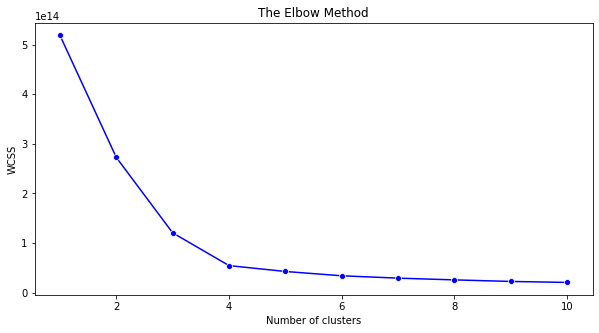

3
Create Plot? n


In [79]:
runner(data)

<AxesSubplot:>

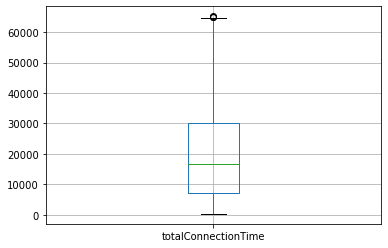

In [80]:
data.boxplot("totalConnectionTime")

In [81]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(caltechDf)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


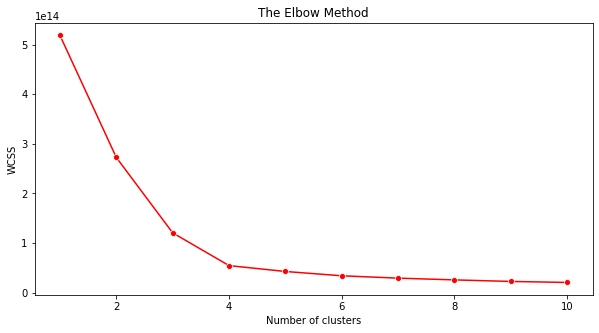

In [82]:

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
labels = kmeans.fit_predict(caltechDf)

In [84]:
labels = list(labels)

In [85]:
caltechDf["cluster"] = labels

<ipython-input-85-35a1386c00b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caltechDf["cluster"] = labels


In [86]:
caltechDf

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,timeDiff,cluster
1,10.013,10745,40266,134510,5616,164415,29521,1
2,5.257,3954,33535,134550,230445,145144,29581,2
3,5.177,5296,33508,143706,235534,160522,28212,2
4,10.119,10796,30158,144034,230312,174030,19362,2
5,7.910,5678,38020,144350,11730,161828,32342,1
...,...,...,...,...,...,...,...,...
31416,16.370,17090,21087,194316,13443,2806,3997,0
31417,2.902,3783,9604,195330,223334,205633,5821,2
31419,2.285,1718,11563,211253,2536,214131,9845,1
31420,6.715,7263,13485,211704,10149,231807,6222,1


In [89]:
caltechDf.loc[caltechDf["cluster"] == 0].to_csv("cluster0.csv")
caltechDf.loc[caltechDf["cluster"] == 1].to_csv("cluster1.csv")
caltechDf.loc[caltechDf["cluster"] == 2].to_csv("cluster2.csv")

## END HERE CLUSTERS

In [345]:
print(originalDoneChargingTime[211], caltechDf.doneTime[211])

2018-04-30 01:18:48 11848


In [346]:
caltechDf.head()

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,110804,132010,132110,7932,86340,1
1,10.013,10745,40266,134510,5616,164415,10013,29521,0
2,5.257,3954,33535,134550,230445,145144,5257,29581,1
3,5.177,5296,33508,143706,235534,160522,5177,28212,1
4,10.119,10796,30158,144034,230312,174030,10119,19362,1


In [151]:
originalConnectionTime

['2018-04-25 11:08:04',
 '2018-04-25 13:45:10',
 '2018-04-25 13:45:50',
 '2018-04-25 14:37:06',
 '2018-04-25 14:40:34',
 '2018-04-25 14:43:50',
 '2018-04-25 14:47:42',
 '2018-04-25 14:58:25',
 '2018-04-25 15:10:52',
 '2018-04-25 15:12:11',
 '2018-04-25 15:14:06',
 '2018-04-25 15:14:41',
 '2018-04-25 15:14:49',
 '2018-04-25 15:20:56',
 '2018-04-25 15:30:31',
 '2018-04-25 15:31:42',
 '2018-04-25 15:33:45',
 '2018-04-25 15:44:42',
 '2018-04-25 15:48:23',
 '2018-04-25 15:51:21',
 '2018-04-25 15:53:29',
 '2018-04-25 15:57:29',
 '2018-04-25 15:59:24',
 '2018-04-25 16:01:26',
 '2018-04-25 16:02:03',
 '2018-04-25 16:02:10',
 '2018-04-25 16:03:59',
 '2018-04-25 16:04:31',
 '2018-04-25 16:25:51',
 '2018-04-25 16:38:01',
 '2018-04-25 16:52:05',
 '2018-04-25 17:06:18',
 '2018-04-25 18:22:03',
 '2018-04-25 18:47:12',
 '2018-04-25 19:32:05',
 '2018-04-25 19:33:01',
 '2018-04-25 19:40:02',
 '2018-04-25 19:41:42',
 '2018-04-25 19:43:13',
 '2018-04-25 20:14:50',
 '2018-04-25 20:30:49',
 '2018-04-25 21:

In [152]:
caltechDf["connTime"] = originalConnectionTime
caltechDf["disconnTime"] = originalDisconnectTime
caltechDf["doneTime"] = originalDoneChargingTime

In [153]:
caltechDf.head()

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7932,86340,0
1,10.013,10745,40266,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10013,29521,1
2,5.257,3954,33535,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5257,29581,0
3,5.177,5296,33508,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5177,28212,0
4,10.119,10796,30158,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10119,19362,0


In [154]:
caltechDf.cluster.value_counts()

0    11161
1     8555
2     5767
3     3886
Name: cluster, dtype: int64

In [155]:
caltechDf.columns

Index(['kWhDelivered', 'totalChargingTime', 'totalConnectionTime', 'connTime',
       'disconnTime', 'doneTime', 'wHdelievered', 'timeDiff', 'cluster'],
      dtype='object')

In [156]:
caltechDf[caltechDf["cluster"] == 0]

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7932,86340,0
2,5.257,3954,33535,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5257,29581,0
3,5.177,5296,33508,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5177,28212,0
4,10.119,10796,30158,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10119,19362,0
6,15.294,13200,13209,2018-04-25 14:47:42,2018-04-25 18:27:51,2018-04-25 18:27:42,15294,9,0
...,...,...,...,...,...,...,...,...,...
31409,0.939,1833,14323,2021-09-13 16:55:21,2021-09-13 20:54:04,2021-09-13 17:25:54,939,12490,0
31410,1.185,1780,2191,2021-09-13 17:04:27,2021-09-13 17:40:58,2021-09-13 17:34:07,1185,411,0
31414,5.634,3085,3091,2021-09-13 18:08:24,2021-09-13 18:59:55,2021-09-13 18:59:49,5634,6,0
31415,4.331,5240,16446,2021-09-13 18:34:00,2021-09-13 23:08:06,2021-09-13 20:01:20,4331,11206,0


In [157]:
caltechDf[caltechDf["cluster"] == 0]["totalChargingTime"]

0         7986
2         3954
3         5296
4        10796
6        13200
         ...  
31409     1833
31410     1780
31414     3085
31415     5240
31417     3783
Name: totalChargingTime, Length: 11161, dtype: int64

In [158]:
import numpy as np

In [159]:
caltechDf.connTime[0]

'2018-04-25 11:08:04'

In [160]:
asddad

NameError: name 'asddad' is not defined

In [162]:
from dateutil import parser


cTimes = list(caltechDf.connTime)[::]
for idx, time in enumerate(cTimes):
    dt = parser.parse(time)
    cTimes[idx] = datetime(2020, 1, 1, dt.hour, 
                           dt.minute, dt.second)
    
cTimes
    
    
    
    

[datetime.datetime(2020, 1, 1, 11, 8, 4),
 datetime.datetime(2020, 1, 1, 13, 45, 10),
 datetime.datetime(2020, 1, 1, 13, 45, 50),
 datetime.datetime(2020, 1, 1, 14, 37, 6),
 datetime.datetime(2020, 1, 1, 14, 40, 34),
 datetime.datetime(2020, 1, 1, 14, 43, 50),
 datetime.datetime(2020, 1, 1, 14, 47, 42),
 datetime.datetime(2020, 1, 1, 14, 58, 25),
 datetime.datetime(2020, 1, 1, 15, 10, 52),
 datetime.datetime(2020, 1, 1, 15, 12, 11),
 datetime.datetime(2020, 1, 1, 15, 14, 6),
 datetime.datetime(2020, 1, 1, 15, 14, 41),
 datetime.datetime(2020, 1, 1, 15, 14, 49),
 datetime.datetime(2020, 1, 1, 15, 20, 56),
 datetime.datetime(2020, 1, 1, 15, 30, 31),
 datetime.datetime(2020, 1, 1, 15, 31, 42),
 datetime.datetime(2020, 1, 1, 15, 33, 45),
 datetime.datetime(2020, 1, 1, 15, 44, 42),
 datetime.datetime(2020, 1, 1, 15, 48, 23),
 datetime.datetime(2020, 1, 1, 15, 51, 21),
 datetime.datetime(2020, 1, 1, 15, 53, 29),
 datetime.datetime(2020, 1, 1, 15, 57, 29),
 datetime.datetime(2020, 1, 1, 15, 5

In [163]:
help(datetime)

Help on class datetime in module datetime:

class datetime(date)
 |  datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
 |  
 |  The year, month and day arguments are required. tzinfo may be None, or an
 |  instance of a tzinfo subclass. The remaining arguments may be ints.
 |  
 |  Method resolution order:
 |      datetime
 |      date
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __radd__(self, value

In [164]:
for i in cTimes:
    if isinstance(i, datetime):
        continue
    else:
        print("asd")

In [165]:
caltechDf.head()

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7932,86340,0
1,10.013,10745,40266,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10013,29521,1
2,5.257,3954,33535,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5257,29581,0
3,5.177,5296,33508,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5177,28212,0
4,10.119,10796,30158,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10119,19362,0


In [166]:
safeCopy = caltechDf.copy()

In [167]:
caltechDf["connTime"] = cTimes

In [168]:
caltechDf.head()

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,2020-01-01 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7932,86340,0
1,10.013,10745,40266,2020-01-01 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10013,29521,1
2,5.257,3954,33535,2020-01-01 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5257,29581,0
3,5.177,5296,33508,2020-01-01 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5177,28212,0
4,10.119,10796,30158,2020-01-01 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10119,19362,0


In [169]:

disTimes = list(caltechDf.disconnTime)[::]
for idx, time in enumerate(disTimes):
    dt = parser.parse(time)
    disTimes[idx] = datetime(2020, 1, 1, dt.hour, 
                           dt.minute, dt.second)
    
disTimes

[datetime.datetime(2020, 1, 1, 13, 20, 10),
 datetime.datetime(2020, 1, 1, 0, 56, 16),
 datetime.datetime(2020, 1, 1, 23, 4, 45),
 datetime.datetime(2020, 1, 1, 23, 55, 34),
 datetime.datetime(2020, 1, 1, 23, 3, 12),
 datetime.datetime(2020, 1, 1, 1, 17, 30),
 datetime.datetime(2020, 1, 1, 18, 27, 51),
 datetime.datetime(2020, 1, 1, 19, 6, 29),
 datetime.datetime(2020, 1, 1, 18, 15, 46),
 datetime.datetime(2020, 1, 1, 18, 29, 21),
 datetime.datetime(2020, 1, 1, 18, 33, 30),
 datetime.datetime(2020, 1, 1, 2, 26, 3),
 datetime.datetime(2020, 1, 1, 23, 52, 50),
 datetime.datetime(2020, 1, 1, 23, 49, 32),
 datetime.datetime(2020, 1, 1, 19, 47, 51),
 datetime.datetime(2020, 1, 1, 0, 57, 15),
 datetime.datetime(2020, 1, 1, 0, 42, 15),
 datetime.datetime(2020, 1, 1, 0, 41, 45),
 datetime.datetime(2020, 1, 1, 0, 32, 18),
 datetime.datetime(2020, 1, 1, 0, 32, 44),
 datetime.datetime(2020, 1, 1, 0, 28, 12),
 datetime.datetime(2020, 1, 1, 1, 28, 29),
 datetime.datetime(2020, 1, 1, 0, 51, 51),
 da

In [170]:
caltechDf.head()

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,2020-01-01 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7932,86340,0
1,10.013,10745,40266,2020-01-01 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10013,29521,1
2,5.257,3954,33535,2020-01-01 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5257,29581,0
3,5.177,5296,33508,2020-01-01 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5177,28212,0
4,10.119,10796,30158,2020-01-01 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10119,19362,0


In [171]:
caltechDf["disconnTime"] = disTimes

In [172]:
caltechDf.head()

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,2020-01-01 11:08:04,2020-01-01 13:20:10,2018-04-25 13:21:10,7932,86340,0
1,10.013,10745,40266,2020-01-01 13:45:10,2020-01-01 00:56:16,2018-04-25 16:44:15,10013,29521,1
2,5.257,3954,33535,2020-01-01 13:45:50,2020-01-01 23:04:45,2018-04-25 14:51:44,5257,29581,0
3,5.177,5296,33508,2020-01-01 14:37:06,2020-01-01 23:55:34,2018-04-25 16:05:22,5177,28212,0
4,10.119,10796,30158,2020-01-01 14:40:34,2020-01-01 23:03:12,2018-04-25 17:40:30,10119,19362,0


In [173]:
for i in disTimes:
    if isinstance(i, datetime):
        continue
    else:
        print("asd")

In [174]:
doneTime = list(caltechDf.doneTime)[::]
for idx, time in enumerate(doneTime):
    dt = parser.parse(time)
    doneTime[idx] = datetime(2020, 1, 1, dt.hour, 
                           dt.minute, dt.second)
    


In [175]:
for i in doneTime:
    if isinstance(i, datetime):
        continue
    else:
        print("asd")

In [176]:
caltechDf.head()

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,2020-01-01 11:08:04,2020-01-01 13:20:10,2018-04-25 13:21:10,7932,86340,0
1,10.013,10745,40266,2020-01-01 13:45:10,2020-01-01 00:56:16,2018-04-25 16:44:15,10013,29521,1
2,5.257,3954,33535,2020-01-01 13:45:50,2020-01-01 23:04:45,2018-04-25 14:51:44,5257,29581,0
3,5.177,5296,33508,2020-01-01 14:37:06,2020-01-01 23:55:34,2018-04-25 16:05:22,5177,28212,0
4,10.119,10796,30158,2020-01-01 14:40:34,2020-01-01 23:03:12,2018-04-25 17:40:30,10119,19362,0


In [177]:
caltechDf["doneTime"] = doneTime

In [178]:
caltechDf.head()

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,2020-01-01 11:08:04,2020-01-01 13:20:10,2020-01-01 13:21:10,7932,86340,0
1,10.013,10745,40266,2020-01-01 13:45:10,2020-01-01 00:56:16,2020-01-01 16:44:15,10013,29521,1
2,5.257,3954,33535,2020-01-01 13:45:50,2020-01-01 23:04:45,2020-01-01 14:51:44,5257,29581,0
3,5.177,5296,33508,2020-01-01 14:37:06,2020-01-01 23:55:34,2020-01-01 16:05:22,5177,28212,0
4,10.119,10796,30158,2020-01-01 14:40:34,2020-01-01 23:03:12,2020-01-01 17:40:30,10119,19362,0


In [179]:
type(caltechDf.connTime[0])

pandas._libs.tslibs.timestamps.Timestamp

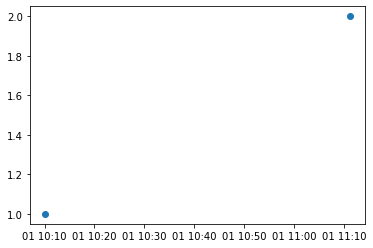

In [180]:
a = [datetime(2000, 1, 1, 10, 10, 10), datetime(2000, 1, 1, 11, 11, 11)]
b = [1, 2]
plt.plot_date(a, b)

In [181]:
type(a[0]), a[0]

(datetime.datetime, datetime.datetime(2000, 1, 1, 10, 10, 10))

In [182]:
a = list(caltechDf[caltechDf["cluster"] == 0]["connTime"])
b = [1 for i in a]
idxes = []
for idx, i in enumerate(a):
    if isinstance(i, datetime):
        continue
    else:
        idxes.append(idx)

In [183]:
isinstance(a[0], datetime)
a[46]

Timestamp('2020-01-01 15:19:27')

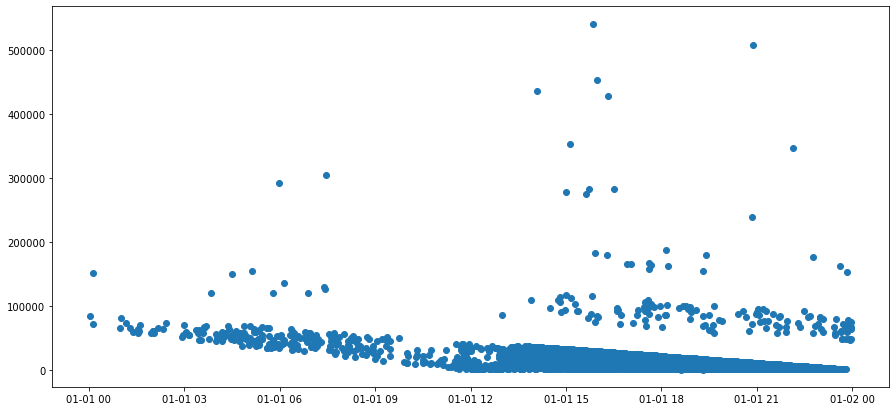

In [184]:
plt.figure(figsize=(15,7))

plt.plot_date(caltechDf[caltechDf["cluster"] == 0]["connTime"], 
              caltechDf[caltechDf["cluster"] == 0]["totalConnectionTime"])

/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

<AxesSubplot:xlabel='connTime', ylabel='totalConnectionTime'>

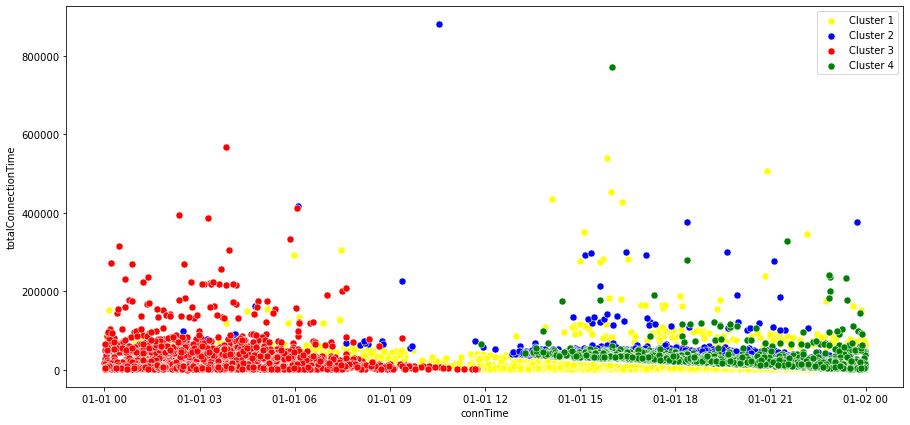

In [185]:
plt.figure(figsize=(15,7))
sns.scatterplot(caltechDf[caltechDf["cluster"] == 0]["connTime"], caltechDf[caltechDf["cluster"] == 0]["totalConnectionTime"], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 1]["connTime"], caltechDf[caltechDf["cluster"] == 1]["totalConnectionTime"], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 2]["connTime"], caltechDf[caltechDf["cluster"] == 2]["totalConnectionTime"], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 3]["connTime"], caltechDf[caltechDf["cluster"] == 3]["totalConnectionTime"], color = 'green', label = 'Cluster 4',s=50)


In [186]:
# for i in caltechDf.columns:
#     for j in caltechDf.columns:
#         if i == j:
#             continue
#         plt.figure(figsize=(15,7))
        
#         sns.scatterplot(caltechDf[caltechDf["cluster"] == 0][i], caltechDf[caltechDf["cluster"] == 0][j], color = 'yellow', label = 'Cluster 1',s=50)
#         sns.scatterplot(caltechDf[caltechDf["cluster"] == 1][i], caltechDf[caltechDf["cluster"] == 1][j], color = 'blue', label = 'Cluster 1',s=50)
#         sns.scatterplot(caltechDf[caltechDf["cluster"] == 2][i], caltechDf[caltechDf["cluster"] == 2][j], color = 'red', label = 'Cluster 1',s=50)
#         sns.scatterplot(caltechDf[caltechDf["cluster"] == 3][i], caltechDf[caltechDf["cluster"] == 3][j], color = 'green', label = 'Cluster 1',s=50)

        

In [187]:
caltechDf

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,2020-01-01 11:08:04,2020-01-01 13:20:10,2020-01-01 13:21:10,7932,86340,0
1,10.013,10745,40266,2020-01-01 13:45:10,2020-01-01 00:56:16,2020-01-01 16:44:15,10013,29521,1
2,5.257,3954,33535,2020-01-01 13:45:50,2020-01-01 23:04:45,2020-01-01 14:51:44,5257,29581,0
3,5.177,5296,33508,2020-01-01 14:37:06,2020-01-01 23:55:34,2020-01-01 16:05:22,5177,28212,0
4,10.119,10796,30158,2020-01-01 14:40:34,2020-01-01 23:03:12,2020-01-01 17:40:30,10119,19362,0
...,...,...,...,...,...,...,...,...,...
31416,16.370,17090,21087,2020-01-01 19:43:16,2020-01-01 01:34:43,2020-01-01 00:28:06,16370,3997,3
31417,2.902,3783,9604,2020-01-01 19:53:30,2020-01-01 22:33:34,2020-01-01 20:56:33,2902,5821,0
31419,2.285,1718,11563,2020-01-01 21:12:53,2020-01-01 00:25:36,2020-01-01 21:41:31,2285,9845,1
31420,6.715,7263,13485,2020-01-01 21:17:04,2020-01-01 01:01:49,2020-01-01 23:18:07,6715,6222,1


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

<AxesSubplot:xlabel='connTime', ylabel='doneTime'>

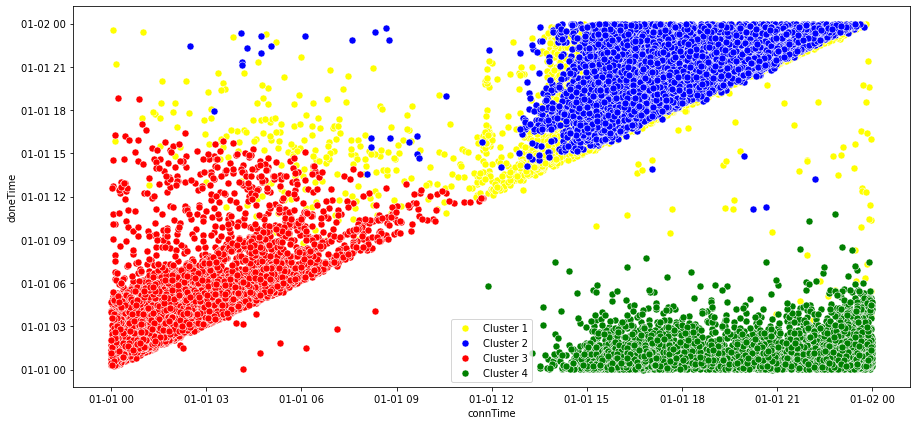

In [188]:
plt.figure(figsize=(15,7))
sns.scatterplot(caltechDf[caltechDf["cluster"] == 0]["connTime"], caltechDf[caltechDf["cluster"] == 0]["doneTime"], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 1]["connTime"], caltechDf[caltechDf["cluster"] == 1]["doneTime"], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 2]["connTime"], caltechDf[caltechDf["cluster"] == 2]["doneTime"], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 3]["connTime"], caltechDf[caltechDf["cluster"] == 3]["doneTime"], color = 'green', label = 'Cluster 4',s=50)


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

<AxesSubplot:xlabel='connTime', ylabel='disconnTime'>

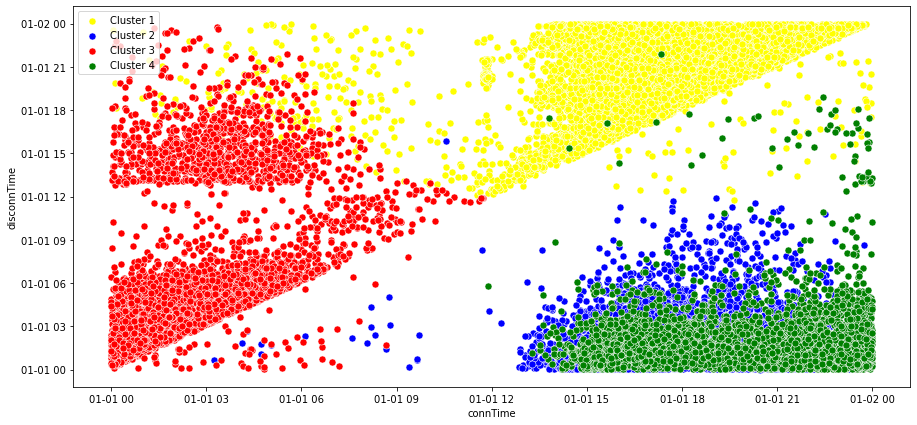

In [189]:
plt.figure(figsize=(15,7))
sns.scatterplot(caltechDf[caltechDf["cluster"] == 0]["connTime"], caltechDf[caltechDf["cluster"] == 0]["disconnTime"], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 1]["connTime"], caltechDf[caltechDf["cluster"] == 1]["disconnTime"], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 2]["connTime"], caltechDf[caltechDf["cluster"] == 2]["disconnTime"], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 3]["connTime"], caltechDf[caltechDf["cluster"] == 3]["disconnTime"], color = 'green', label = 'Cluster 4',s=50)


In [190]:
caltechDf

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,2020-01-01 11:08:04,2020-01-01 13:20:10,2020-01-01 13:21:10,7932,86340,0
1,10.013,10745,40266,2020-01-01 13:45:10,2020-01-01 00:56:16,2020-01-01 16:44:15,10013,29521,1
2,5.257,3954,33535,2020-01-01 13:45:50,2020-01-01 23:04:45,2020-01-01 14:51:44,5257,29581,0
3,5.177,5296,33508,2020-01-01 14:37:06,2020-01-01 23:55:34,2020-01-01 16:05:22,5177,28212,0
4,10.119,10796,30158,2020-01-01 14:40:34,2020-01-01 23:03:12,2020-01-01 17:40:30,10119,19362,0
...,...,...,...,...,...,...,...,...,...
31416,16.370,17090,21087,2020-01-01 19:43:16,2020-01-01 01:34:43,2020-01-01 00:28:06,16370,3997,3
31417,2.902,3783,9604,2020-01-01 19:53:30,2020-01-01 22:33:34,2020-01-01 20:56:33,2902,5821,0
31419,2.285,1718,11563,2020-01-01 21:12:53,2020-01-01 00:25:36,2020-01-01 21:41:31,2285,9845,1
31420,6.715,7263,13485,2020-01-01 21:17:04,2020-01-01 01:01:49,2020-01-01 23:18:07,6715,6222,1


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

<AxesSubplot:xlabel='connTime', ylabel='wHdelievered'>

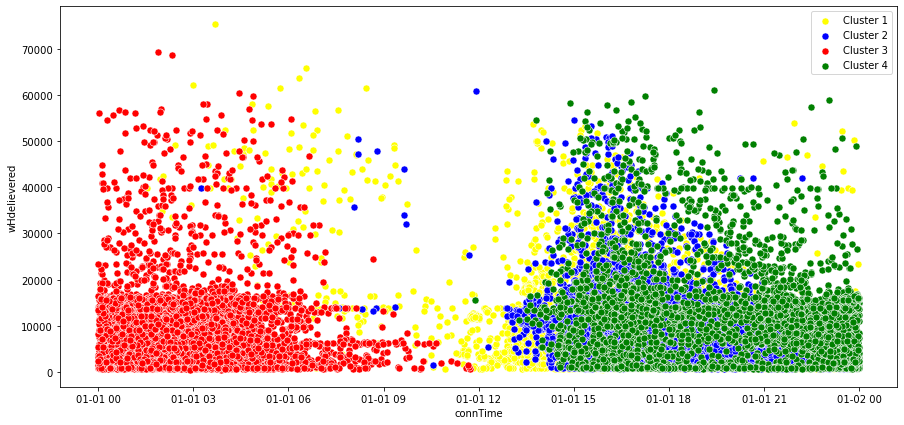

In [191]:
plt.figure(figsize=(15,7))
sns.scatterplot(caltechDf[caltechDf["cluster"] == 0]["connTime"], caltechDf[caltechDf["cluster"] == 0]["wHdelievered"], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 1]["connTime"], caltechDf[caltechDf["cluster"] == 1]["wHdelievered"], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 2]["connTime"], caltechDf[caltechDf["cluster"] == 2]["wHdelievered"], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 3]["connTime"], caltechDf[caltechDf["cluster"] == 3]["wHdelievered"], color = 'green', label = 'Cluster 4',s=50)


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

<AxesSubplot:xlabel='connTime', ylabel='totalChargingTime'>

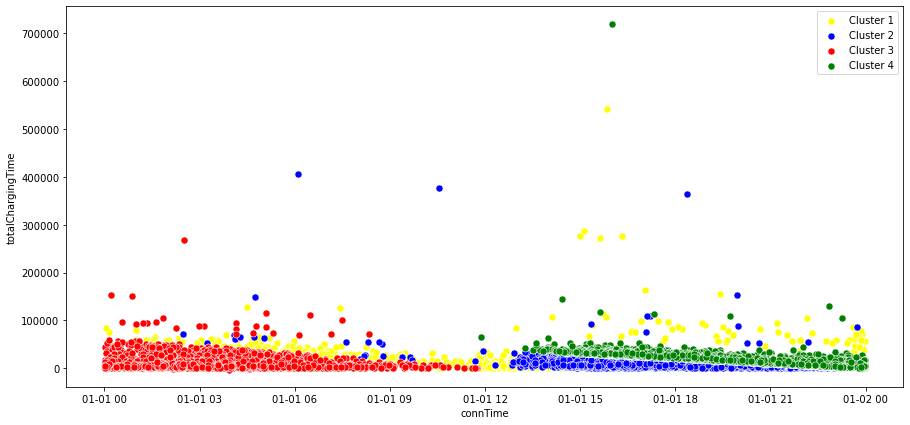

In [192]:
plt.figure(figsize=(15,7))
sns.scatterplot(caltechDf[caltechDf["cluster"] == 0]["connTime"], caltechDf[caltechDf["cluster"] == 0]["totalChargingTime"], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 1]["connTime"], caltechDf[caltechDf["cluster"] == 1]["totalChargingTime"], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 2]["connTime"], caltechDf[caltechDf["cluster"] == 2]["totalChargingTime"], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 3]["connTime"], caltechDf[caltechDf["cluster"] == 3]["totalChargingTime"], color = 'green', label = 'Cluster 4',s=50)


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

<AxesSubplot:xlabel='doneTime', ylabel='wHdelievered'>

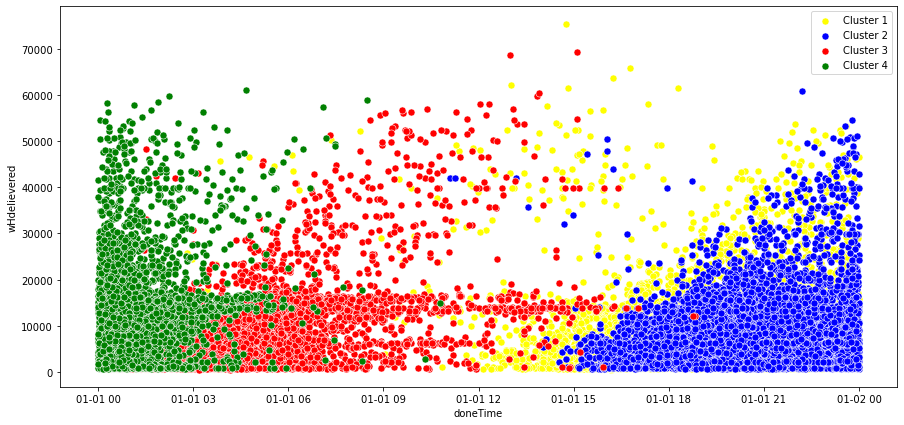

In [193]:
plt.figure(figsize=(15,7))
sns.scatterplot(caltechDf[caltechDf["cluster"] == 0]["doneTime"], caltechDf[caltechDf["cluster"] == 0]["wHdelievered"], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 1]["doneTime"], caltechDf[caltechDf["cluster"] == 1]["wHdelievered"], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 2]["doneTime"], caltechDf[caltechDf["cluster"] == 2]["wHdelievered"], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 3]["doneTime"], caltechDf[caltechDf["cluster"] == 3]["wHdelievered"], color = 'green', label = 'Cluster 4',s=50)


In [194]:
caltechDf.head()

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,2020-01-01 11:08:04,2020-01-01 13:20:10,2020-01-01 13:21:10,7932,86340,0
1,10.013,10745,40266,2020-01-01 13:45:10,2020-01-01 00:56:16,2020-01-01 16:44:15,10013,29521,1
2,5.257,3954,33535,2020-01-01 13:45:50,2020-01-01 23:04:45,2020-01-01 14:51:44,5257,29581,0
3,5.177,5296,33508,2020-01-01 14:37:06,2020-01-01 23:55:34,2020-01-01 16:05:22,5177,28212,0
4,10.119,10796,30158,2020-01-01 14:40:34,2020-01-01 23:03:12,2020-01-01 17:40:30,10119,19362,0


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

<AxesSubplot:xlabel='wHdelievered', ylabel='totalConnectionTime'>

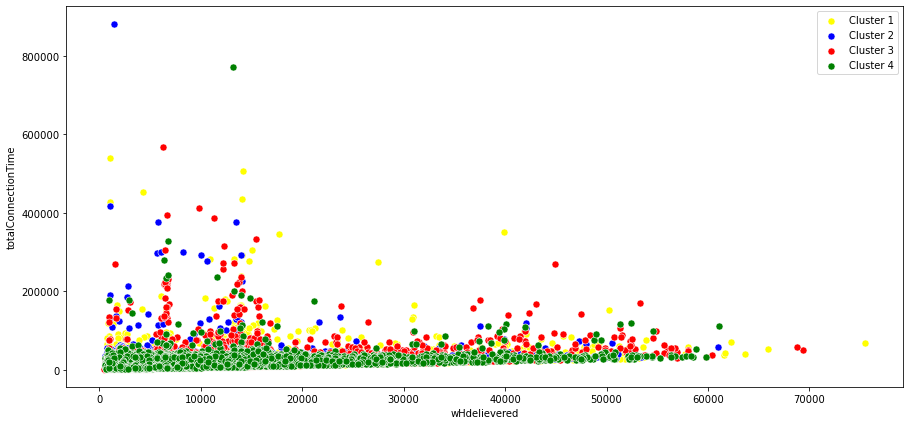

In [195]:
plt.figure(figsize=(15,7))
sns.scatterplot(caltechDf[caltechDf["cluster"] == 0]["wHdelievered"], caltechDf[caltechDf["cluster"] == 0]["totalConnectionTime"], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 1]["wHdelievered"], caltechDf[caltechDf["cluster"] == 1]["totalConnectionTime"], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 2]["wHdelievered"], caltechDf[caltechDf["cluster"] == 2]["totalConnectionTime"], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 3]["wHdelievered"], caltechDf[caltechDf["cluster"] == 3]["totalConnectionTime"], color = 'green', label = 'Cluster 4',s=50)


In [196]:
caltechDf.head()

,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff,cluster
0,7.932,7986,7926,2020-01-01 11:08:04,2020-01-01 13:20:10,2020-01-01 13:21:10,7932,86340,0
1,10.013,10745,40266,2020-01-01 13:45:10,2020-01-01 00:56:16,2020-01-01 16:44:15,10013,29521,1
2,5.257,3954,33535,2020-01-01 13:45:50,2020-01-01 23:04:45,2020-01-01 14:51:44,5257,29581,0
3,5.177,5296,33508,2020-01-01 14:37:06,2020-01-01 23:55:34,2020-01-01 16:05:22,5177,28212,0
4,10.119,10796,30158,2020-01-01 14:40:34,2020-01-01 23:03:12,2020-01-01 17:40:30,10119,19362,0


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

<AxesSubplot:xlabel='totalConnectionTime', ylabel='totalChargingTime'>

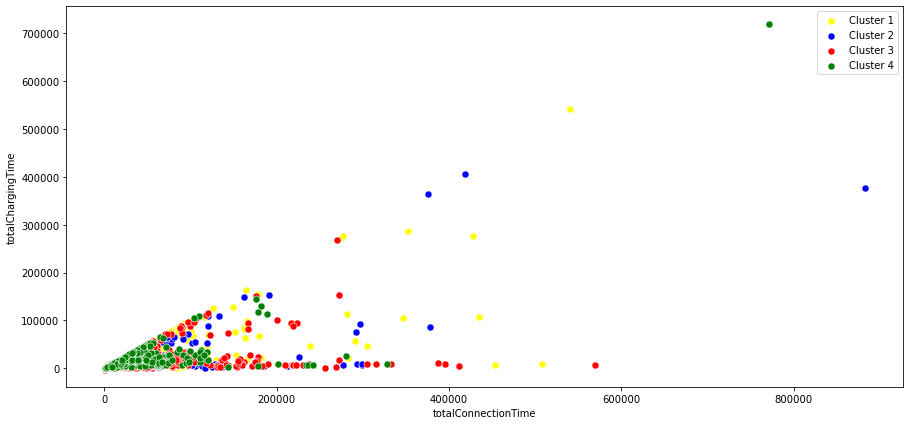

In [197]:
plt.figure(figsize=(15,7))
sns.scatterplot(caltechDf[caltechDf["cluster"] == 0]["totalConnectionTime"], caltechDf[caltechDf["cluster"] == 0]["totalChargingTime"], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 1]["totalConnectionTime"], caltechDf[caltechDf["cluster"] == 1]["totalChargingTime"], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 2]["totalConnectionTime"], caltechDf[caltechDf["cluster"] == 2]["totalChargingTime"], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(caltechDf[caltechDf["cluster"] == 3]["totalConnectionTime"], caltechDf[caltechDf["cluster"] == 3]["totalChargingTime"], color = 'green', label = 'Cluster 4',s=50)


In [198]:
## Get ratio

In [199]:
caltechDf.cluster.value_counts()

0    11161
1     8555
2     5767
3     3886
Name: cluster, dtype: int64

## 2. Transactions dataset

In [91]:
transactions = pd.read_csv("transactionPostCleaning.csv", index_col=0)

In [92]:
transactions.head()

,TransactionId,ChargePoint,Connector,UTCTransactionStart,UTCTransactionStop,StartCard,ConnectedTime,ChargeTime,TotalEnergy,MaxPower,StartHour,StartMinutes,StartTime
0,3491779,0abf481c2d3f5866a8fc7feaae460fd0,1,2019-08-27 14:52:00,2019-08-27 17:58:19,0c24de2f8216313f75daf876ec7c2223e17c866462ae41...,3.11,3.10,9.86,3.342,14,52,14:52:00
1,3326963,a22a6a745ff09431c3a0cef7373042ee,2,2019-03-01 10:14:05,2019-03-01 13:13:54,fd31273615db1421e4be23b51db9f1c5c904ebed131b5d...,3.00,3.00,9.38,3.440,10,14,10:14:05
2,3469263,f4f5e5fbf8297d4889e49f10942b030b,1,2019-07-31 12:54:10,2019-07-31 13:21:45,f876668fd30216c9054a890007143b4d40d13ddd9234c7...,0.46,0.46,1.45,3.160,12,54,12:54:10
3,3429356,0f87094588f6330a84f30797f0458fc8,1,2019-06-16 10:55:57,2019-06-16 14:35:14,06776db669a8f444bf7f81edc7fcf6c18c51bfd90eed2f...,3.65,3.65,38.77,10.813,10,55,10:55:57
4,3332751,77f3b31920754dac44d2b7400f16bca3,1,2019-03-07 21:21:04,2019-03-08 07:22:59,f88e7e074d5476d4e8a532ae1e1966de2d3f333f3c4453...,10.03,7.15,26.14,3.884,21,21,21:21:04


In [93]:
transactions.shape

(10000, 13)

In [94]:
def dropOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    return df.loc[filter]  

In [95]:
transactions = dropOutliers(transactions, "ConnectedTime")

<AxesSubplot:>

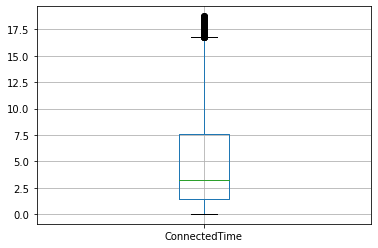

In [96]:
transactions.boxplot("ConnectedTime")

<AxesSubplot:>

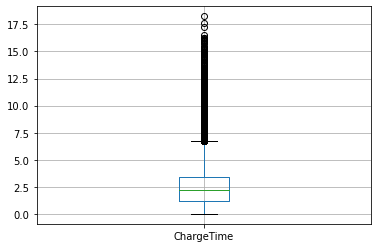

In [97]:
transactions.boxplot("ChargeTime")

In [98]:
transactions = dropOutliers(transactions, "ChargeTime")

<AxesSubplot:>

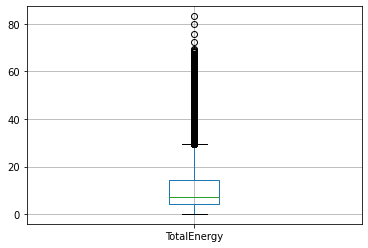

In [99]:
transactions.boxplot("TotalEnergy")

In [100]:
transactions = dropOutliers(transactions, "TotalEnergy")

In [101]:
'MaxPower'

'MaxPower'

<AxesSubplot:>

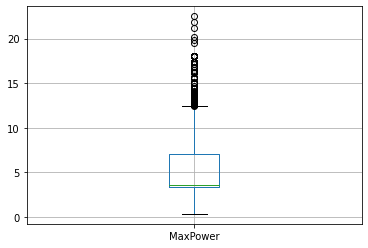

In [102]:
transactions.boxplot("MaxPower")

In [103]:
transactions = dropOutliers(transactions, "MaxPower")

<AxesSubplot:>

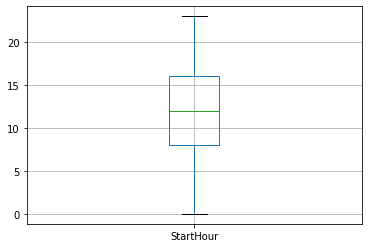

In [104]:
transactions.boxplot("StartHour")

<AxesSubplot:>

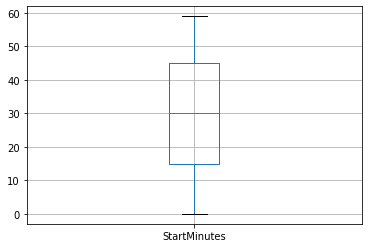

In [105]:
transactions.boxplot("StartMinutes")

In [106]:
transactions.shape

(8099, 13)

In [107]:
transactions.dropna().shape
# No null values

(8099, 13)

In [108]:
transactions.columns

Index(['TransactionId', 'ChargePoint', 'Connector', 'UTCTransactionStart',
       'UTCTransactionStop', 'StartCard', 'ConnectedTime', 'ChargeTime',
       'TotalEnergy', 'MaxPower', 'StartHour', 'StartMinutes', 'StartTime'],
      dtype='object')

In [109]:
dropCols = ["TransactionId", "ChargePoint", "Connector", "StartCard", "StartHour", "StartMinutes", "StartTime"]

In [110]:
transactions.drop(columns = dropCols, inplace = True)

In [111]:
transactions.head()

,UTCTransactionStart,UTCTransactionStop,ConnectedTime,ChargeTime,TotalEnergy,MaxPower
0,2019-08-27 14:52:00,2019-08-27 17:58:19,3.11,3.10,9.86,3.342
1,2019-03-01 10:14:05,2019-03-01 13:13:54,3.00,3.00,9.38,3.440
2,2019-07-31 12:54:10,2019-07-31 13:21:45,0.46,0.46,1.45,3.160
5,2019-09-05 16:34:21,2019-09-05 19:10:24,2.60,2.60,22.20,10.000
6,2019-02-23 04:31:51,2019-02-23 10:15:10,5.72,3.47,23.91,7.080


In [112]:
startTimes = list(transactions.UTCTransactionStart)
originalStartTimes = startTimes.copy()

In [113]:
timeToInt(startTimes[0])

145200

In [114]:
for idx in range(len(startTimes)):
    startTimes[idx] = timeToInt(startTimes[idx])

In [115]:
startTimes

[145200,
 101405,
 125410,
 163421,
 43151,
 120155,
 165917,
 145742,
 102735,
 123303,
 91938,
 85314,
 195033,
 103241,
 92739,
 93050,
 190337,
 202045,
 182410,
 155749,
 82516,
 182532,
 63325,
 95354,
 90746,
 100511,
 124805,
 155922,
 71134,
 152750,
 63958,
 132906,
 112340,
 141207,
 83248,
 131146,
 64002,
 172026,
 183723,
 74306,
 173233,
 172026,
 182936,
 74621,
 175740,
 181509,
 70945,
 180042,
 134151,
 101852,
 100817,
 95023,
 150848,
 130232,
 184600,
 73843,
 150535,
 102159,
 114501,
 155859,
 110324,
 144720,
 112211,
 172709,
 100639,
 115108,
 132459,
 73142,
 204735,
 90245,
 140631,
 60004,
 161800,
 114039,
 65902,
 174430,
 124845,
 104035,
 174355,
 171455,
 54507,
 111642,
 113750,
 112952,
 152440,
 161930,
 54013,
 82644,
 91228,
 180800,
 131433,
 191538,
 50841,
 103236,
 70609,
 45957,
 122622,
 160505,
 111827,
 115331,
 132344,
 91355,
 104644,
 173532,
 153847,
 112503,
 54335,
 120413,
 55300,
 90109,
 161326,
 130844,
 103037,
 181006,
 143353

In [116]:
stopTimes = list(transactions.UTCTransactionStop)
originalStopTimes = stopTimes.copy()

In [117]:
for idx in range(len(stopTimes)):
    stopTimes[idx] = timeToInt(stopTimes[idx])

In [118]:
transactions["StartTime"] = startTimes
transactions["StopTimes"] = stopTimes

In [119]:
transactions

,UTCTransactionStart,UTCTransactionStop,ConnectedTime,ChargeTime,TotalEnergy,MaxPower,StartTime,StopTimes
0,2019-08-27 14:52:00,2019-08-27 17:58:19,3.11,3.10,9.86,3.342,145200,175819
1,2019-03-01 10:14:05,2019-03-01 13:13:54,3.00,3.00,9.38,3.440,101405,131354
2,2019-07-31 12:54:10,2019-07-31 13:21:45,0.46,0.46,1.45,3.160,125410,132145
5,2019-09-05 16:34:21,2019-09-05 19:10:24,2.60,2.60,22.20,10.000,163421,191024
6,2019-02-23 04:31:51,2019-02-23 10:15:10,5.72,3.47,23.91,7.080,43151,101510
...,...,...,...,...,...,...,...,...
9995,2019-10-12 19:13:35,2019-10-12 21:58:11,2.74,2.74,27.13,10.462,191335,215811
9996,2019-10-20 17:13:46,2019-10-21 05:11:55,11.97,5.52,15.90,3.320,171346,51155
9997,2019-10-13 07:59:53,2019-10-13 08:22:46,0.38,0.38,4.19,11.288,75953,82246
9998,2019-02-02 20:38:21,2019-02-03 10:50:48,14.21,3.61,11.62,3.360,203821,105048


In [120]:
transactions.drop(columns = ["UTCTransactionStart", "UTCTransactionStop"], inplace = True)

In [121]:
transactions

,ConnectedTime,ChargeTime,TotalEnergy,MaxPower,StartTime,StopTimes
0,3.11,3.10,9.86,3.342,145200,175819
1,3.00,3.00,9.38,3.440,101405,131354
2,0.46,0.46,1.45,3.160,125410,132145
5,2.60,2.60,22.20,10.000,163421,191024
6,5.72,3.47,23.91,7.080,43151,101510
...,...,...,...,...,...,...
9995,2.74,2.74,27.13,10.462,191335,215811
9996,11.97,5.52,15.90,3.320,171346,51155
9997,0.38,0.38,4.19,11.288,75953,82246
9998,14.21,3.61,11.62,3.360,203821,105048


In [122]:
chargeTimes = list(transactions.ChargeTime)

In [123]:
# chargeTimes[0] == 

In [124]:
stopTimes[0] / 1000 - startTimes[0] / 1000

30.619

In [125]:
## Converting KW to W

In [126]:
totalEnergy = list(transactions.TotalEnergy)

In [127]:
for idx in range(len(totalEnergy)):
    totalEnergy[idx] = int(totalEnergy[idx] * 1000)

In [128]:
maxPowers = list(transactions.MaxPower)
for idx in range(len(maxPowers)):
    maxPowers[idx] = int(maxPowers[idx] * 1000)
    

In [129]:
transactions.drop(columns = ["MaxPower", "TotalEnergy"], inplace = True)

In [130]:
transactions["MaxPower"] = maxPowers
transactions["TotalEnergy"] = totalEnergy

In [131]:
transactions

,ConnectedTime,ChargeTime,StartTime,StopTimes,MaxPower,TotalEnergy
0,3.11,3.10,145200,175819,3342,9860
1,3.00,3.00,101405,131354,3440,9380
2,0.46,0.46,125410,132145,3160,1450
5,2.60,2.60,163421,191024,10000,22200
6,5.72,3.47,43151,101510,7080,23910
...,...,...,...,...,...,...
9995,2.74,2.74,191335,215811,10462,27130
9996,11.97,5.52,171346,51155,3320,15900
9997,0.38,0.38,75953,82246,11288,4190
9998,14.21,3.61,203821,105048,3360,11620


In [132]:
transactions["timeDiff"] = transactions["ConnectedTime"] - transactions["ChargeTime"]

In [133]:
transactions.corr()

,ConnectedTime,ChargeTime,StartTime,StopTimes,MaxPower,TotalEnergy,timeDiff
ConnectedTime,1.000000,0.552358,0.180243,-0.308833,-0.039607,0.357387,0.951332
ChargeTime,0.552358,1.000000,0.020941,0.001703,-0.082759,0.684905,0.268586
StartTime,0.180243,0.020941,1.000000,0.248501,0.053167,0.055867,0.200534
StopTimes,-0.308833,0.001703,0.248501,1.000000,0.000744,0.020564,-0.357495
MaxPower,-0.039607,-0.082759,0.053167,0.000744,1.000000,0.537667,-0.015172
TotalEnergy,0.357387,0.684905,0.055867,0.020564,0.537667,1.000000,0.159776
timeDiff,0.951332,0.268586,0.200534,-0.357495,-0.015172,0.159776,1.000000


### Connected Time vs Stop Time (Rel with Start Time)

In [134]:

# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(transactions)
#     # inertia method returns wcss for that model
#     wcss.append(kmeans.inertia_)
# plt.figure(figsize=(10,5))
# sns.lineplot(range(1, 11), wcss,marker='o',color='red')
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [135]:
# kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
# labels = kmeans.fit_predict(transactions)

In [136]:
# clusters = list(labels)

In [137]:
# transactions["Cluster"] = clusters

In [138]:
# transactions.Cluster.value_counts()

In [139]:
transactions.head()

,ConnectedTime,ChargeTime,StartTime,StopTimes,MaxPower,TotalEnergy,timeDiff
0,3.11,3.10,145200,175819,3342,9860,0.01
1,3.00,3.00,101405,131354,3440,9380,0.00
2,0.46,0.46,125410,132145,3160,1450,0.00
5,2.60,2.60,163421,191024,10000,22200,0.00
6,5.72,3.47,43151,101510,7080,23910,2.25


In [140]:
# transactions["timeDiff"] = transactions["ConnectedTime"] - transactions["ChargeTime"]

In [141]:
# transactions["StartTime"] = originalStartTimes
# transactions["StopTimes"] = originalStopTimes

In [142]:
# sTimes = list(transactions.StartTime)[::]
# for idx, time in enumerate(sTimes):
#     dt = parser.parse(time)
#     sTimes[idx] = datetime(2020, 1, 1, dt.hour, 
#                            dt.minute, dt.second)
    
# sTimes

In [143]:
# for i in sTimes:
#     if isinstance(i, datetime):
#         continue
#     else:
#         print("asd")

In [144]:
# transactions["StartTime"] = sTimes

In [145]:
# stopTimes = list(transactions.StopTimes)[::]
# for idx, time in enumerate(stopTimes):
#     dt = parser.parse(time)
#     stopTimes[idx] = datetime(2020, 1, 1, dt.hour, 
#                            dt.minute, dt.second)
    
# stopTimes

In [146]:
# for i in stopTimes:
#     if isinstance(i, datetime):
#         continue
#     else:
#         print("asd")

In [147]:
# transactions["StopTimes"] = stopTimes

In [148]:
# transactions.head()

In [149]:
# plt.figure(figsize=(15,7))
# sns.scatterplot(transactions[transactions["Cluster"] == 0]["StartTime"], transactions[transactions["Cluster"] == 0]["ChargeTime"], color = 'red', label = 'Cluster 1')
# sns.scatterplot(transactions[transactions["Cluster"] == 1]["StartTime"], transactions[transactions["Cluster"] == 1]["ChargeTime"], color = 'blue', label = 'Cluster 2')
# sns.scatterplot(transactions[transactions["Cluster"] == 2]["StartTime"], transactions[transactions["Cluster"] == 2]["ChargeTime"], color = 'green', label = 'Cluster 3')


In [150]:
# plt.figure(figsize=(15,7))
# sns.scatterplot(transactions[transactions["Cluster"] == 0]["StartTime"], transactions[transactions["Cluster"] == 0]["TotalEnergy"], color = 'red', label = 'Cluster 1')
# sns.scatterplot(transactions[transactions["Cluster"] == 1]["StartTime"], transactions[transactions["Cluster"] == 1]["TotalEnergy"], color = 'blue', label = 'Cluster 2')
# sns.scatterplot(transactions[transactions["Cluster"] == 2]["StartTime"], transactions[transactions["Cluster"] == 2]["TotalEnergy"], color = 'green', label = 'Cluster 3')


In [151]:
# transactions.head()

In [152]:
# plt.figure(figsize=(15,7))
# sns.scatterplot(transactions[transactions["Cluster"] == 0]["StartTime"], transactions[transactions["Cluster"] == 0]["StopTimes"], color = 'red', label = 'Cluster 1')
# sns.scatterplot(transactions[transactions["Cluster"] == 1]["StartTime"], transactions[transactions["Cluster"] == 1]["StopTimes"], color = 'blue', label = 'Cluster 2')
# sns.scatterplot(transactions[transactions["Cluster"] == 2]["StartTime"], transactions[transactions["Cluster"] == 2]["StopTimes"], color = 'green', label = 'Cluster 3')


In [153]:
# plt.figure(figsize=(15,7))
# sns.scatterplot(transactions[transactions["Cluster"] == 0]["StopTimes"], transactions[transactions["Cluster"] == 0]["MaxPower"], color = 'red', label = 'Cluster 1')
# sns.scatterplot(transactions[transactions["Cluster"] == 1]["StopTimes"], transactions[transactions["Cluster"] == 1]["MaxPower"], color = 'blue', label = 'Cluster 2')
# sns.scatterplot(transactions[transactions["Cluster"] == 2]["StopTimes"], transactions[transactions["Cluster"] == 2]["MaxPower"], color = 'green', label = 'Cluster 3')


In [154]:
# transactions.head()

In [155]:
# plt.figure(figsize=(15,7))
# sns.scatterplot(transactions[transactions["Cluster"] == 0]["StartTime"], transactions[transactions["Cluster"] == 0]["ConnectedTime"], color = 'red', label = 'Cluster 1')
# sns.scatterplot(transactions[transactions["Cluster"] == 1]["StartTime"], transactions[transactions["Cluster"] == 1]["ConnectedTime"], color = 'blue', label = 'Cluster 2')
# sns.scatterplot(transactions[transactions["Cluster"] == 2]["StartTime"], transactions[transactions["Cluster"] == 2]["ConnectedTime"], color = 'green', label = 'Cluster 3')


In [156]:
# plt.figure(figsize=(15,7))
# sns.scatterplot(transactions[transactions["Cluster"] == 0]["ConnectedTime"], transactions[transactions["Cluster"] == 0]["ChargeTime"], color = 'red', label = 'Cluster 1')
# sns.scatterplot(transactions[transactions["Cluster"] == 1]["ConnectedTime"], transactions[transactions["Cluster"] == 1]["ChargeTime"], color = 'blue', label = 'Cluster 2')
# sns.scatterplot(transactions[transactions["Cluster"] == 2]["ConnectedTime"], transactions[transactions["Cluster"] == 2]["ChargeTime"], color = 'green', label = 'Cluster 3')


In [342]:
transactions.head()

,ConnectedTime,ChargeTime,StartTime,StopTimes,MaxPower,TotalEnergy,timeDiff
0,3.11,3.10,145200,175819,3342,9860,0.01
1,3.00,3.00,101405,131354,3440,9380,0.00
2,0.46,0.46,125410,132145,3160,1450,0.00
5,2.60,2.60,163421,191024,10000,22200,0.00
6,5.72,3.47,43151,101510,7080,23910,2.25


In [343]:
max(transactions.timeDiff)

17.22

In [157]:
from sklearn.cluster import KMeans
def clusterData(k):
    df = k.copy()
#     print(df.head())
#     print(type(df))
#     print(df.dtypes)
#     return
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(df)
        # inertia method returns wcss for that model
        wcss.append(kmeans.inertia_)
    print("WCSS:", wcss)
    plt.figure(figsize=(10,5))
    sns.lineplot(range(1, 11), wcss,marker='o',color='red')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
    n = int(input())
    
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 42)
    labels = kmeans.fit_predict(df)
    labels = list(labels)
    
    df["Cluster"] = labels
    
    print(df.Cluster.value_counts())
    
    
    if "StartTime" in df.columns:
        df["StartTime"] = originalStartTimes
        sTimes = list(df.StartTime)[::]
        for idx, time in enumerate(sTimes):
            dt = parser.parse(time)
            sTimes[idx] = datetime(2020, 1, 1, dt.hour, 
                                   dt.minute, dt.second)
        df["StartTime"] = sTimes
    if "StopTimes" in df.columns:
        df["StopTimes"] = originalStopTimes
        stopTimes = list(df.StopTimes)[::]
        for idx, time in enumerate(stopTimes):
            dt = parser.parse(time)
            stopTimes[idx] = datetime(2020, 1, 1, dt.hour, 
                                   dt.minute, dt.second)
        df["StopTimes"] = stopTimes
    
    while True:
        command = input("New plot? ")
        if command == "n":
            break
        print(df.columns)
        x = input("X: ")
        y = input("Y: ")
        
        plt.figure(figsize=(15,7))
        cols = ["Red", "Green", "Blue", "Yellow", "Black"]
        for i, col in zip(range(n), cols[:n]):
            sns.scatterplot(df[df["Cluster"] == i][x], df[df["Cluster"] == i][y], color = col, label = 'Cluster {}'.format(i))
        plt.show()
    return df

In [158]:
data1 = transactions.copy()

WCSS: [30510551936934.535, 17566004669452.484, 8865240175518.686, 6119937373605.407, 4841353277775.713, 4024590202536.4204, 3547462092858.8013, 3173482595215.9033, 2932044199212.61, 2684526174642.3853]


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


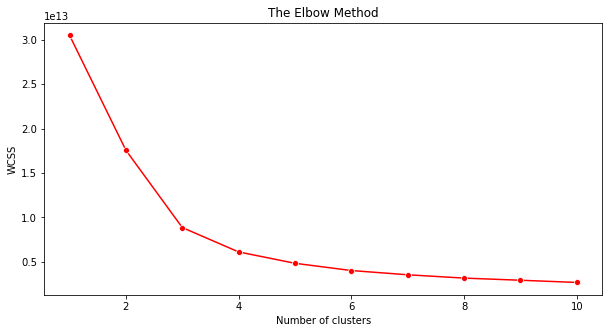

3
0    4197
1    2921
2     981
Name: Cluster, dtype: int64
New plot? y
Index(['ConnectedTime', 'ChargeTime', 'StartTime', 'StopTimes', 'MaxPower',
       'TotalEnergy', 'timeDiff', 'Cluster'],
      dtype='object')
X: ConnectedTime
Y: ChargeTime


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

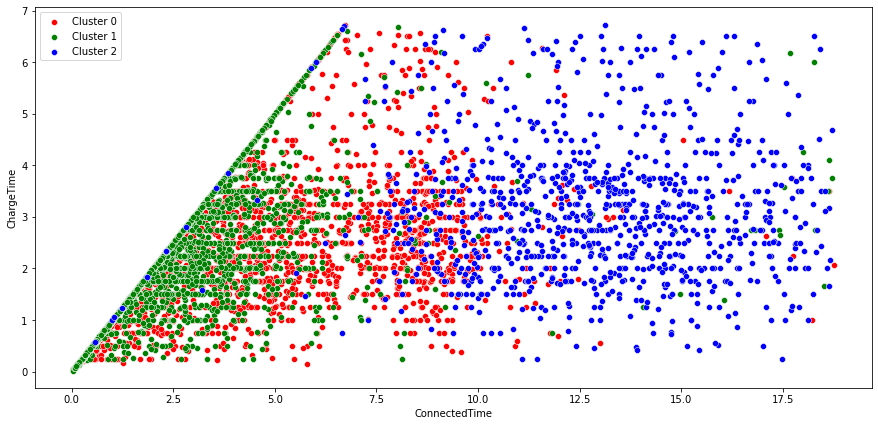

New plot? y
Index(['ConnectedTime', 'ChargeTime', 'StartTime', 'StopTimes', 'MaxPower',
       'TotalEnergy', 'timeDiff', 'Cluster'],
      dtype='object')
X: StartTime
Y: StopTimes


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

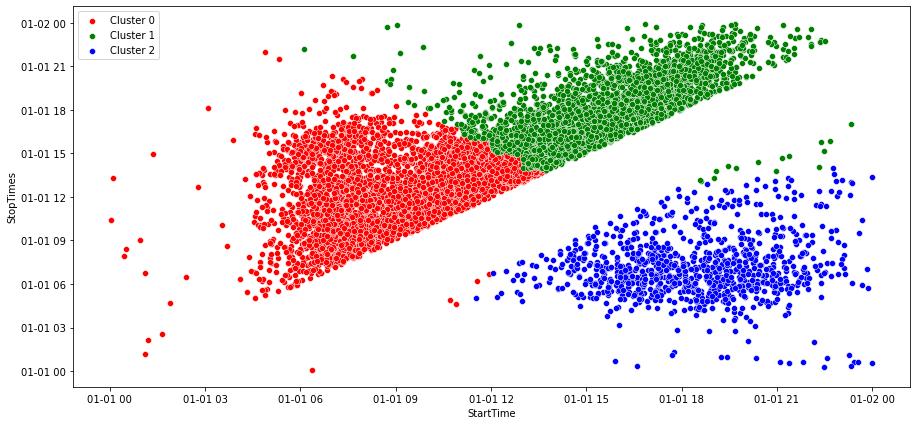

New plot? n


,ConnectedTime,ChargeTime,StartTime,StopTimes,MaxPower,TotalEnergy,timeDiff,Cluster
0,3.11,3.10,2020-01-01 14:52:00,2020-01-01 17:58:19,3342,9860,0.01,1
1,3.00,3.00,2020-01-01 10:14:05,2020-01-01 13:13:54,3440,9380,0.00,0
2,0.46,0.46,2020-01-01 12:54:10,2020-01-01 13:21:45,3160,1450,0.00,0
5,2.60,2.60,2020-01-01 16:34:21,2020-01-01 19:10:24,10000,22200,0.00,1
6,5.72,3.47,2020-01-01 04:31:51,2020-01-01 10:15:10,7080,23910,2.25,0
...,...,...,...,...,...,...,...,...
9995,2.74,2.74,2020-01-01 19:13:35,2020-01-01 21:58:11,10462,27130,0.00,1
9996,11.97,5.52,2020-01-01 17:13:46,2020-01-01 05:11:55,3320,15900,6.45,2
9997,0.38,0.38,2020-01-01 07:59:53,2020-01-01 08:22:46,11288,4190,0.00,0
9998,14.21,3.61,2020-01-01 20:38:21,2020-01-01 10:50:48,3360,11620,10.60,2


In [159]:
clusterData(data1)

In [160]:
def runIt(x):
    temp = x.copy()
    dCols = []
    
    while True:
        command = input("Drop col?")
        if command == "n":
            break
        print(temp.columns)
        cols = input("Enter columns to drop:")
        dCols = cols.split(" ")
        
        temp.drop(columns = dCols, inplace = True)
        
        break
    finalDf = clusterData(temp)
    return finalDf

In [161]:
data = transactions.copy()

Drop col?y
Index(['ConnectedTime', 'ChargeTime', 'StartTime', 'StopTimes', 'MaxPower',
       'TotalEnergy', 'timeDiff'],
      dtype='object')
Enter columns to drop:ChargeTime
WCSS: [30510551922760.5, 17566019271300.145, 8865240162586.959, 6119937360725.445, 4841353266166.495, 4024590191050.751, 3547491087249.5103, 3173584333748.9023, 2932044187624.181, 2684526163020.8745]


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


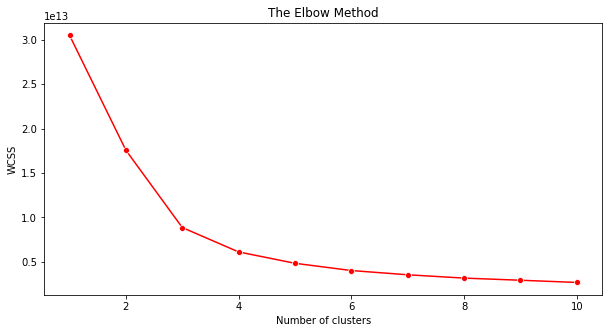

3
0    4197
1    2921
2     981
Name: Cluster, dtype: int64
New plot? y
Index(['ConnectedTime', 'StartTime', 'StopTimes', 'MaxPower', 'TotalEnergy',
       'timeDiff', 'Cluster'],
      dtype='object')
X: StartTime
Y: StopTime


KeyError: 'StopTime'

<Figure size 1080x504 with 0 Axes>

In [162]:
runIt(data)

In [99]:
data2 = caltechDf.copy()

Drop col?y
Index(['kWhDelivered', 'totalChargingTime', 'totalConnectionTime', 'connTime',
       'disconnTime', 'doneTime', 'wHdelievered', 'timeDiff'],
      dtype='object')
Enter columns to drop:disconnTime
WCSS: [352287485220367.75, 139274796199506.64, 65490570504364.055, 52580104479153.5, 45930798766229.52, 41408735785203.77, 37095628438628.14, 33275605758617.9, 30393801111688.938, 28121288692232.7]


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


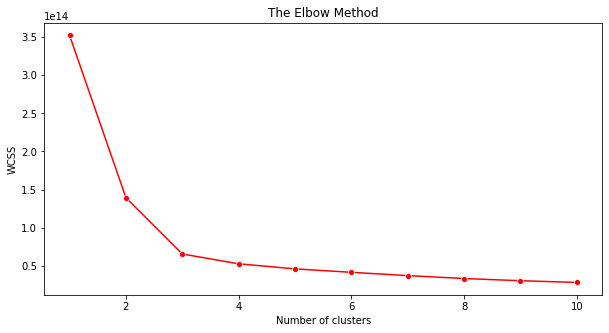

3
0    19553
1     5895
2     3921
Name: Cluster, dtype: int64
New plot? y
Index(['kWhDelivered', 'totalChargingTime', 'totalConnectionTime', 'connTime',
       'doneTime', 'wHdelievered', 'timeDiff', 'Cluster'],
      dtype='object')
X: totalConnectionTime
Y: doneTime


/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishnutammishetti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

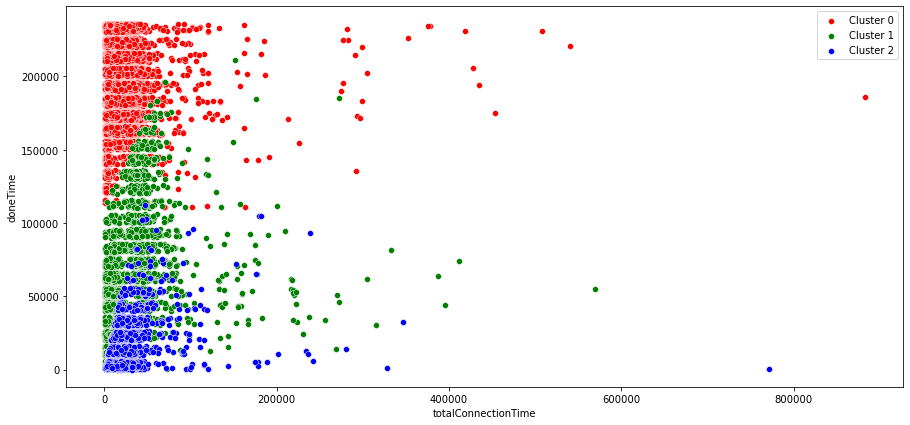

New plot? n


,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,doneTime,wHdelievered,timeDiff,Cluster
0,7.932,7986,7926,110804,132110,7932,86340,0
1,10.013,10745,40266,134510,164415,10013,29521,0
2,5.257,3954,33535,134550,145144,5257,29581,0
3,5.177,5296,33508,143706,160522,5177,28212,0
4,10.119,10796,30158,144034,174030,10119,19362,0
...,...,...,...,...,...,...,...,...
31416,16.370,17090,21087,194316,2806,16370,3997,2
31417,2.902,3783,9604,195330,205633,2902,5821,0
31419,2.285,1718,11563,211253,214131,2285,9845,0
31420,6.715,7263,13485,211704,231807,6715,6222,0


In [100]:
runIt(data2)

In [ ]:
[42724846247423.72,
 27130079630674.484,
 13032692731306.982, 
 9926133618869.855, 
 8160038251304.957, 
 7248440872786.276, 6452846509395.783, 5913883604874.481, 5410543376689.334, 5095799924513.237]